In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
img = cv2.imread('./data/supra.jpeg')
H, W, C = img.shape

In [3]:
# Gaussian Filter
K_size = 3
sigma = 1.3

In [4]:
# Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

In [5]:
# Kernal
K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(-pad, -pad+K_size):
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp(-(x**2 + y**2) / (2*(sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()

for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y, pad+x, c] = np.sum(K * out[y:y+K_size, x:x+K_size, c])

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

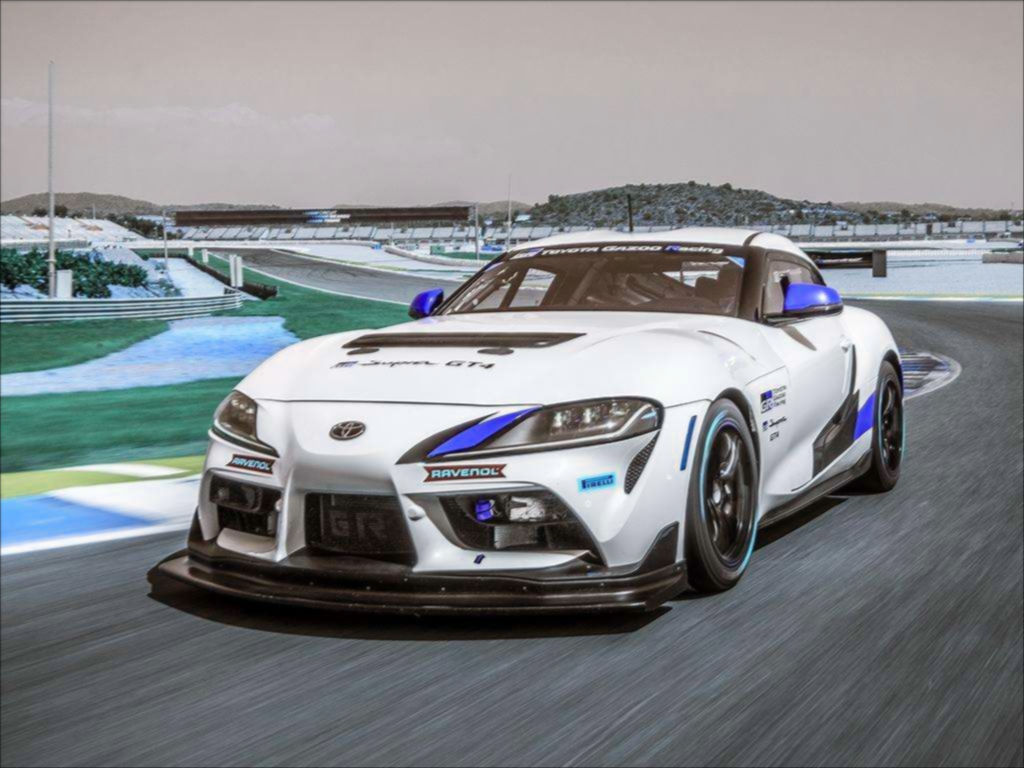

In [8]:
Image.fromarray(out)